## Convolutional Neural Network using CIFAR-10 image dataset

#### Problem : 
Develop a Convolutional Neural Network model by using Keras and tensorflow libraries on CIFAR-10 image dataset 

#### Dataset information : 
It consist of 60,000(32x32 pixel) color images(RGB) in 10 class. It has 6000 images in each class and it's distributed as 50,000 images as training dataset and 10,000 images as test dataset. The 10 classes present in datasets are :
`0 : airplane` `2 : bird` `3 : cat` `4 : deer` `5 : dog` `6 : frog` `7 : horse` `8 : ship` `9 : trucks`
All the images in the dataset are mutually exclusive with respect to each class, means each class will only images associated to that class category.

#### Goal : 
To build a CNN classification model with higher accuracy for CIFAR-10 image dataset.

In [ ]:
#Import required libraries
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras import datasets, models, layers
from tensorflow.keras.layers import Dense, Conv2D, Activation, Flatten, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix


###### Import the dataset from the Keras datasets and it's already divided into training and test dataset. 

In [ ]:
# Load the dataset
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

# Size of training dataset
print("Training dataset size: ")
print(X_train.shape)
print(y_train.shape)

# Size of test dataset
print("Test dataset size: ")
print(X_test.shape)
print(y_test.shape)

170508288/170498071 [==============================] - 4s 0us/step
Training dataset size: 
(50000, 32, 32, 3)
(50000, 1)
Test dataset size: 
(10000, 32, 32, 3)
(10000, 1)


###### Since the Dataset has 10 classes and each class can be identified as integers. Lets use one hot encoding for converting the integer into a 10 element vector.

In [ ]:
#Classes in above dataset
nclass = 10
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

# one hot encoding :
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# Target dataset size :
print(y_test.shape)
print(y_test.shape)

(10000, 10)
(10000, 10)


###### Lets transform the integer datatype into float32 datatype and normalize the dataset: 

In [ ]:
# Lets convert from integers to float32 datatype
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Lets perform normalization to range the data between 0-1
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
 # Lets split the above training dataset into training and validation dataset
 X_train_new = X_train[:45000] 
 y_train_new = y_train[:45000] 
 X_valid = X_train[45000:] 
 y_valid = y_train[45000:]

###### Lets create two functions for plotting accuracy and loss curve to evaluate the performance of the model

In [ ]:
# Function to plot the accuracy with respect to model for training and validation dataset
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='Training accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation accuracy')
  plt.title('Model Accuracy')       
  plt.xlabel('No. of Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc = 'lower right')
  plt.show()

In [ ]:
# Function to plot the loss with respect to model for training and validation dataset
def plot_loss(history):  
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Model loss')
    plt.xlabel('No. of Epochs')
    plt.ylabel('Loss')
    plt.legend(loc = 'lower right')
    plt.show()

`Convolutional Neural Network` has been the best deep neural model for working with image data. CNN consist of convolutional layers & pooling layer. 

Lets start building CNN model with single layer consisting of 2 convolution layer with 32 and 64 filters respectively of 3*3 size of convolution window and below parameters:
- `ReLU` : activation function
- `SAME` : padding value, we means outputs will have the same spatial dimensions as it's inputs. 
- `he_uniform` : kernel_initializer, to intialize random weight of CNN layer. Since we are using ReLU as activation function, he_uniform would be best options to intialize weights from Uniform distribution. This would intialize weights similarly in all the model which will help to compare all the below models.
- `input_shape` : (32, 32, 3) as 32*32 pixel color image.

followed by :
- `MaxPooling2D` layer which takes the maximum value from an input window in 2D spatial data. 
- `Flatten` layer covert the multi dimentional into single array.
- 1 `Dense` layer with ReLU(activation function) as fully connected layer
- 1 `Dense` layer with Softmax(activation function) as output layer

Compile the model with 
- `Adam` : optimizer, It's a gradient-based algorithm and it uses the squared gradients to adopt the learning rate.

Now, fit this model to our training dataset and run for `25 epochs`.

Lets evaluate the model's performance by plotting accuracy and loss curve and compare there error difference.

In [ ]:
# Define CNN model
cnn = Sequential()

cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform', input_shape=(32, 32, 3))) # Convolutional layer
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform')) # Convolutional layer
cnn.add(MaxPooling2D(pool_size=(2, 2))) # pooling layer

cnn.add(Flatten()) 
cnn.add(Dense(128, activation='relu')) # fully connected layer
cnn.add(Dense(10, activation='softmax')) # output layer

# Compile the CNN model
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# fit the CNN model with 90% as training dataset and 10% as validation dataset
history = cnn.fit(X_train_new, y_train_new, batch_size=64, epochs=25, validation_split=0.10)


Epoch 1/25
633/633 [==============================] - 11s 5ms/step - loss: 1.5777 - accuracy: 0.4634 - val_loss: 1.2043 - val_accuracy: 0.5756
Epoch 2/25
633/633 [==============================] - 3s 5ms/step - loss: 1.0119 - accuracy: 0.6440 - val_loss: 1.0174 - val_accuracy: 0.6507
Epoch 3/25
633/633 [==============================] - 3s 5ms/step - loss: 0.8425 - accuracy: 0.7080 - val_loss: 0.9892 - val_accuracy: 0.6567
Epoch 4/25
633/633 [==============================] - 3s 5ms/step - loss: 0.7188 - accuracy: 0.7502 - val_loss: 0.9559 - val_accuracy: 0.6702
Epoch 5/25
633/633 [==============================] - 3s 5ms/step - loss: 0.6075 - accuracy: 0.7917 - val_loss: 0.9741 - val_accuracy: 0.6707
Epoch 6/25
633/633 [==============================] - 3s 5ms/step - loss: 0.5067 - accuracy: 0.8267 - val_loss: 1.0337 - val_accuracy: 0.6642
Epoch 7/25
633/633 [==============================] - 3s 5ms/step - loss: 0.4069 - accuracy: 0.8598 - val_loss: 1.1701 - val_accuracy: 0.6533
Epoch

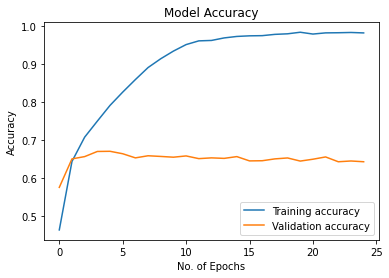

In [ ]:
# ploting accuracy for training and validation dataset
plot_accuracy(history)

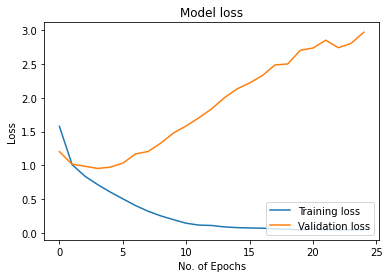

In [ ]:
# ploting loss for training and validation dataset
plot_loss(history)

In [ ]:
# display the accuracy and loss score
print(cnn.metrics_names)
print(cnn.evaluate(X_valid, y_valid, batch_size=64, verbose= 0))

['loss', 'accuracy']
[2.8996169567108154, 0.6570000052452087]


According to above accuracy plots, we can notice the large difference between the training & validation accuracy curve  as well as the validation accuracy curve is below the training accuracy curve which means model performance degraded for validation dataset, which means there is a overfittinfg issue. Training accuracy is almost 99% where as the validation acccuracy is almost 66% with a high loss score which is 2.89. 

###### Lets again use above model with two new parameters:
- `eLU` : activation function
-`nadam` : optimizer, it's an extension of Adam. 
Rest of the parameters are same as above model.

Now, fit this model to our training dataset and run for `25 epochs`.

In [ ]:
# Define CNN model
cnn = Sequential()

cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='elu', padding="same", kernel_initializer='he_uniform', input_shape=(32, 32, 3))) # Convolutional layer
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='elu', padding="same", kernel_initializer='he_uniform')) # Convolutional layer
cnn.add(MaxPooling2D(pool_size=(2, 2))) # pooling layer

cnn.add(Flatten()) 
cnn.add(Dense(128, activation='elu')) # fully connected layer
cnn.add(Dense(10, activation='softmax')) # output layer

# Compile the CNN model
cnn.compile(optimizer='nadam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# fit the CNN model with 80% as training dataset and 10% as validation dataset
history = cnn.fit(X_train_new, y_train_new, batch_size=64, epochs=25, validation_split=0.10)


Epoch 1/25
633/633 [==============================] - 6s 8ms/step - loss: 1.6691 - accuracy: 0.4536 - val_loss: 1.4009 - val_accuracy: 0.5127
Epoch 2/25
633/633 [==============================] - 4s 6ms/step - loss: 1.1288 - accuracy: 0.6059 - val_loss: 1.1259 - val_accuracy: 0.6007
Epoch 3/25
633/633 [==============================] - 4s 6ms/step - loss: 0.9199 - accuracy: 0.6791 - val_loss: 1.0760 - val_accuracy: 0.6282
Epoch 4/25
633/633 [==============================] - 4s 6ms/step - loss: 0.7578 - accuracy: 0.7360 - val_loss: 1.1057 - val_accuracy: 0.6287
Epoch 5/25
633/633 [==============================] - 4s 6ms/step - loss: 0.6129 - accuracy: 0.7854 - val_loss: 1.1364 - val_accuracy: 0.6362
Epoch 6/25
633/633 [==============================] - 4s 6ms/step - loss: 0.4849 - accuracy: 0.8311 - val_loss: 1.2271 - val_accuracy: 0.6436
Epoch 7/25
633/633 [==============================] - 4s 6ms/step - loss: 0.3769 - accuracy: 0.8691 - val_loss: 1.3360 - val_accuracy: 0.6413
Epoch 

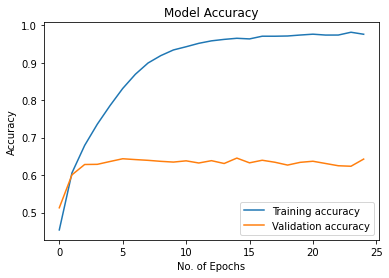

In [ ]:
# ploting accuracy for training and validation dataset
plot_accuracy(history)

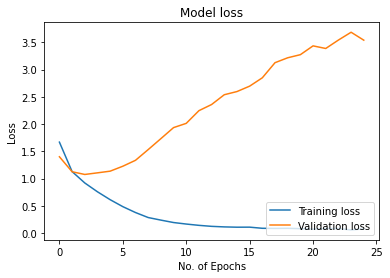

In [ ]:
# ploting loss for training and validation dataset
plot_loss(history)

In [ ]:
# display the accuracy and loss score
print(cnn.metrics_names)
print(cnn.evaluate(X_valid, y_valid, batch_size=64, verbose=0))

['loss', 'accuracy']
[3.5875749588012695, 0.6467999815940857]


We can notice that after using `elu` as activation function and `nadam` as optimizer, still the model still has overfitting issue. The training accuracy is almost 98% where the validation acccuracy is decreased to almost 64.6% with more high loss score 3.58. 

###### Lets have 3 layer, each layer consist of 2 convolution layer, one maxpooling layer with 32, 64 and 128 filters in above model with previous model parameters:
- `ReLU` : activation function and almost same parameter as above.
- `Adam` : deep learning optimizer 

fit this model to our training dataset and run for `25 epochs`.

In [ ]:
# Define CNN model
cnn = Sequential()

cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform',input_shape=(32, 32, 3)))
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(10, activation='softmax'))


# Compile the CNN model
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# fit the CNN model with 80% as training dataset and 10% as validation dataset
history = cnn.fit(X_train_new, y_train_new, batch_size=64, epochs=25, validation_split=0.10)


Epoch 1/25
633/633 [==============================] - 5s 7ms/step - loss: 1.5015 - accuracy: 0.4554 - val_loss: 1.1523 - val_accuracy: 0.5938
Epoch 2/25
633/633 [==============================] - 4s 6ms/step - loss: 1.0062 - accuracy: 0.6454 - val_loss: 0.9477 - val_accuracy: 0.6702
Epoch 3/25
633/633 [==============================] - 4s 6ms/step - loss: 0.7841 - accuracy: 0.7260 - val_loss: 0.9469 - val_accuracy: 0.6716
Epoch 4/25
633/633 [==============================] - 4s 6ms/step - loss: 0.6348 - accuracy: 0.7785 - val_loss: 0.7468 - val_accuracy: 0.7396
Epoch 5/25
633/633 [==============================] - 4s 6ms/step - loss: 0.5171 - accuracy: 0.8204 - val_loss: 0.7687 - val_accuracy: 0.7338
Epoch 6/25
633/633 [==============================] - 4s 6ms/step - loss: 0.4173 - accuracy: 0.8540 - val_loss: 0.7798 - val_accuracy: 0.7469
Epoch 7/25
633/633 [==============================] - 4s 6ms/step - loss: 0.3292 - accuracy: 0.8844 - val_loss: 0.8772 - val_accuracy: 0.7402
Epoch 

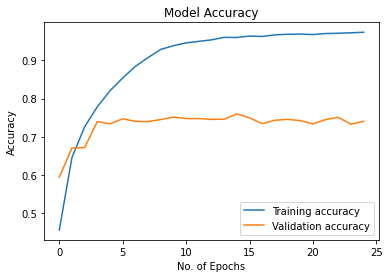

In [ ]:
# ploting accuracy for training and validation dataset
plot_accuracy(history)

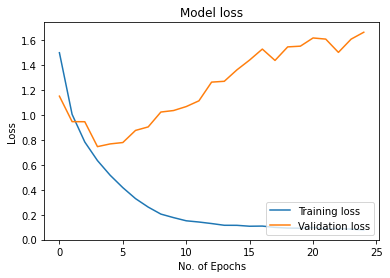

In [ ]:
# ploting loss for training and validation dataset
plot_loss(history)

In [ ]:
# display the accuracy and loss score
print(cnn.metrics_names)
print(cnn.evaluate(X_valid, y_valid, batch_size=64, verbose=0))

['loss', 'accuracy']
[1.566510796546936, 0.7594000101089478]


The performance of model has increased with 3 convolutional layers. Validation accuracy is almost 76% and loss score has also decreased to 1.56 But we can still notice the overfitting issue with this model too. Lets use Regularization to handle overfitting issue by use of L2 regularization and adding weight decay.

###### Lets run above model with L2 regularization and with decay value(0.01):
- `sgd` : optimizer with `learning_rate` : 0.01 as standard value
- `weight decay` : 0.01 as standard value
- `regularization`:  L2(0.01)

fit this model to our training dataset for `25 epochs`.


In [32]:
# Define CNN model
cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01), padding="same", kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01), padding="same", kernel_initializer='he_uniform'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01), padding="same", kernel_initializer='he_uniform'))
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01), padding="same", kernel_initializer='he_uniform'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01), padding="same", kernel_initializer='he_uniform'))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01), padding="same", kernel_initializer='he_uniform'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

# Compile the CNN model
optimizer = SGD(learning_rate=0.01, decay=0.01)
cnn.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# fit the CNN model with 80% as training dataset and 10% as validation dataset
history = cnn.fit(X_train_new, y_train_new, batch_size=64, epochs=25, validation_split=0.10)


Epoch 1/25
633/633 [==============================] - 5s 7ms/step - loss: 10.4358 - accuracy: 0.3070 - val_loss: 10.0963 - val_accuracy: 0.3524
Epoch 2/25
633/633 [==============================] - 4s 6ms/step - loss: 9.8790 - accuracy: 0.3970 - val_loss: 9.7528 - val_accuracy: 0.4162
Epoch 3/25
633/633 [==============================] - 4s 6ms/step - loss: 9.6580 - accuracy: 0.4245 - val_loss: 9.5965 - val_accuracy: 0.4304
Epoch 4/25
633/633 [==============================] - 4s 7ms/step - loss: 9.5233 - accuracy: 0.4364 - val_loss: 9.4884 - val_accuracy: 0.4351
Epoch 5/25
633/633 [==============================] - 4s 7ms/step - loss: 9.4247 - accuracy: 0.4457 - val_loss: 9.4104 - val_accuracy: 0.4440
Epoch 6/25
633/633 [==============================] - 4s 7ms/step - loss: 9.3483 - accuracy: 0.4533 - val_loss: 9.3438 - val_accuracy: 0.4458
Epoch 7/25
633/633 [==============================] - 4s 6ms/step - loss: 9.2846 - accuracy: 0.4560 - val_loss: 9.2801 - val_accuracy: 0.4600
Epoc

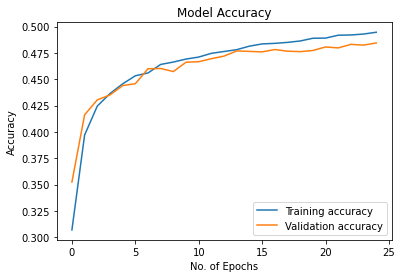

In [33]:
# ploting accuracy for training and validation dataset
plot_accuracy(history)

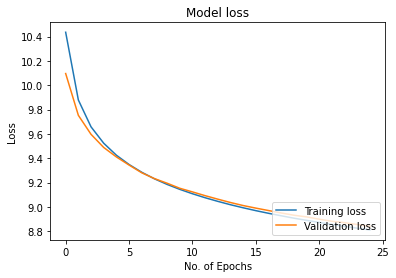

In [34]:
# ploting loss for training and validation dataset
plot_loss(history)

In [36]:
# display the accuracy and loss score
print(cnn.metrics_names)
print(cnn.evaluate(X_valid, y_valid, batch_size=64, verbose=0))

['loss', 'accuracy']
[8.80850887298584, 0.4896000027656555]


The performance of model has decreased dramitically after applying L2 regularization on cnn layers with weight decay(0.01). But the overfitting issue has been gone but the accuracy for training dataset has been decreased to 49.46% and for validation dataset accuracy has been decreased to almost 49% which is very low with high loss score of 8.808.

###### Lets again try to run the above CNN model without L2 regularization and with lower decay value(0.000001):
- `sgd` : activation function with `learning_rate` : 0.01
- `decay` : 0.000001

fit this model to our training dataset and run for `25 epochs`.

In [ ]:
# Define CNN model
cnn = Sequential()

cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

# Compile the CNN model
optimizer = SGD(learning_rate=0.01, decay=0.000001)
cnn.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# fit the CNN model with 80% as training dataset and 10% as validation dataset
history = cnn.fit(X_train_new, y_train_new, batch_size=64, epochs=25, validation_split=0.10)


Epoch 1/25
633/633 [==============================] - 5s 7ms/step - loss: 1.9422 - accuracy: 0.2941 - val_loss: 1.6912 - val_accuracy: 0.3900
Epoch 2/25
633/633 [==============================] - 4s 7ms/step - loss: 1.6096 - accuracy: 0.4231 - val_loss: 1.5515 - val_accuracy: 0.4391
Epoch 3/25
633/633 [==============================] - 4s 7ms/step - loss: 1.4568 - accuracy: 0.4777 - val_loss: 1.5032 - val_accuracy: 0.4624
Epoch 4/25
633/633 [==============================] - 4s 7ms/step - loss: 1.3611 - accuracy: 0.5132 - val_loss: 1.3840 - val_accuracy: 0.5062
Epoch 5/25
633/633 [==============================] - 4s 7ms/step - loss: 1.2825 - accuracy: 0.5420 - val_loss: 1.4610 - val_accuracy: 0.4824
Epoch 6/25
633/633 [==============================] - 4s 7ms/step - loss: 1.2217 - accuracy: 0.5652 - val_loss: 1.2846 - val_accuracy: 0.5349
Epoch 7/25
633/633 [==============================] - 4s 7ms/step - loss: 1.1615 - accuracy: 0.5858 - val_loss: 1.2905 - val_accuracy: 0.5378
Epoch 

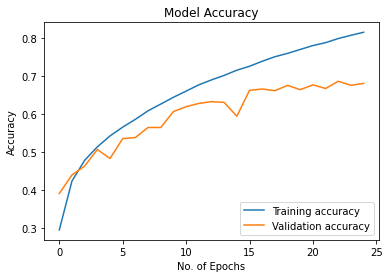

In [ ]:
# ploting accuracy for training and validation dataset
plot_accuracy(history)

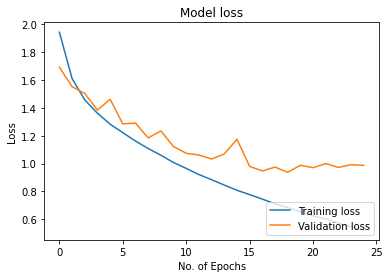

In [ ]:
# ploting loss for training and validation dataset
plot_loss(history)

In [ ]:
# display the accuracy and loss score
print(cnn.metrics_names)
print(cnn.evaluate(X_valid, y_valid, batch_size=64, verbose=0))

['loss', 'accuracy']
[0.9605057835578918, 0.6976000070571899]


The performance of model has now improved after removing applying L2 regularization on cnn layers. But the overfitting issue has appear again but the accuracy for training dataset has been increased to 81.55% and validation accuracy is almost 70% with low loss score 0.96.

Another regularization technique for CNN models is dropout.`Dropout`: It randomly selects neurons which will be dropped out during training. 
###### Lets add Dropout layer after convolution and hidden layer with probability = 0.25 and RMSprop as Optimizer:
- `Dropout` layer with probability = 0.25 
- `RMSprop` : Optimizer with decay value(0.000001), It's best combination of SGD & Adam with adaptive learning rate.

fit this model to our training dataset and run for `25 epochs`. 

In [37]:
# Define CNN model
cnn = Sequential()

cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer 
cnn.add(Dropout(0.25))

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer 
cnn.add(Dropout(0.25))

cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer 
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
# Dropout layer 
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation='softmax'))

# Compile the CNN model
optimizer = RMSprop(decay=0.000001)
cnn.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# fit the CNN model with 80% as training dataset and 10% as validation dataset
history = cnn.fit(X_train_new, y_train_new, batch_size=64, epochs=25, validation_split=0.10)


Epoch 1/25
633/633 [==============================] - 6s 7ms/step - loss: 1.7842 - accuracy: 0.3548 - val_loss: 1.4458 - val_accuracy: 0.4689
Epoch 2/25
633/633 [==============================] - 4s 7ms/step - loss: 1.3273 - accuracy: 0.5264 - val_loss: 1.1111 - val_accuracy: 0.6044
Epoch 3/25
633/633 [==============================] - 4s 7ms/step - loss: 1.0986 - accuracy: 0.6141 - val_loss: 0.9567 - val_accuracy: 0.6607
Epoch 4/25
633/633 [==============================] - 4s 7ms/step - loss: 0.9740 - accuracy: 0.6616 - val_loss: 0.8670 - val_accuracy: 0.6936
Epoch 5/25
633/633 [==============================] - 4s 7ms/step - loss: 0.8859 - accuracy: 0.6918 - val_loss: 0.7961 - val_accuracy: 0.7191
Epoch 6/25
633/633 [==============================] - 4s 7ms/step - loss: 0.8338 - accuracy: 0.7150 - val_loss: 0.8027 - val_accuracy: 0.7218
Epoch 7/25
633/633 [==============================] - 4s 7ms/step - loss: 0.7894 - accuracy: 0.7303 - val_loss: 0.7506 - val_accuracy: 0.7424
Epoch 

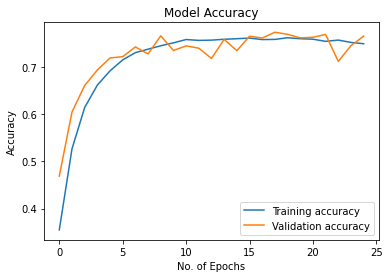

In [38]:
# ploting accuracy for training and validation dataset
plot_accuracy(history)

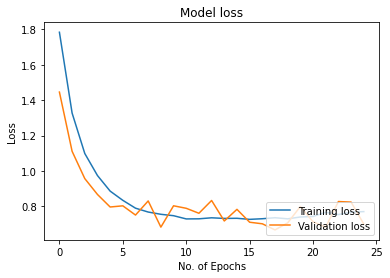

In [39]:
# ploting loss for training and validation dataset
plot_loss(history)

In [40]:
# display the accuracy and loss score
print(cnn.metrics_names)
print(cnn.evaluate(X_valid, y_valid, batch_size=64, verbose=0))

['loss', 'accuracy']
[0.6703301668167114, 0.7788000106811523]


After applying Dropout regularization on layers and using RMSprop as Optimizer, the performance of model has been increased with validation accuracy is almost 78%. The issue of overfitting in model has been vanish with low loss score 0.67.

###### Lets again run the above model with `Dropout regularization with varying probability` like 0.25, 0.30, 0.35 & 0.40 for convolution and hidden layer respectively.

fit this model to our training dataset and run for `25 epochs`.

In [ ]:
# Define CNN model
cnn = Sequential()

cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer 
cnn.add(Dropout(0.25))

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer 
cnn.add(Dropout(0.30))

cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer 
cnn.add(Dropout(0.35))

cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
# Dropout layer added here
cnn.add(Dropout(0.40))
cnn.add(Dense(10, activation='softmax'))

# Compile the CNN model
optimizer = RMSprop(decay=0.000001)
cnn.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# fit the CNN model with 80% as training dataset and 10% as validation dataset
history = cnn.fit(X_train_new, y_train_new, batch_size=64, epochs=25, validation_split=0.10)


Epoch 1/25
633/633 [==============================] - 7s 9ms/step - loss: 1.8683 - accuracy: 0.3079 - val_loss: 1.4740 - val_accuracy: 0.4609
Epoch 2/25
633/633 [==============================] - 6s 9ms/step - loss: 1.4093 - accuracy: 0.4925 - val_loss: 1.1863 - val_accuracy: 0.5682
Epoch 3/25
633/633 [==============================] - 6s 9ms/step - loss: 1.1855 - accuracy: 0.5769 - val_loss: 0.9677 - val_accuracy: 0.6600
Epoch 4/25
633/633 [==============================] - 6s 9ms/step - loss: 1.0382 - accuracy: 0.6350 - val_loss: 0.8983 - val_accuracy: 0.6809
Epoch 5/25
633/633 [==============================] - 6s 9ms/step - loss: 0.9431 - accuracy: 0.6720 - val_loss: 0.8049 - val_accuracy: 0.7176
Epoch 6/25
633/633 [==============================] - 6s 9ms/step - loss: 0.8709 - accuracy: 0.6969 - val_loss: 0.7740 - val_accuracy: 0.7256
Epoch 7/25
633/633 [==============================] - 6s 9ms/step - loss: 0.8247 - accuracy: 0.7165 - val_loss: 0.7539 - val_accuracy: 0.7367
Epoch 

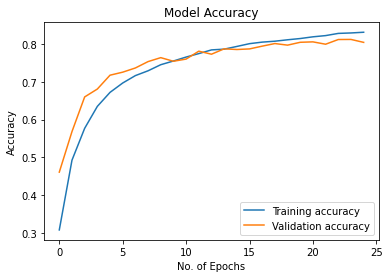

In [ ]:
# ploting accuracy for training and validation dataset
plot_accuracy(history)

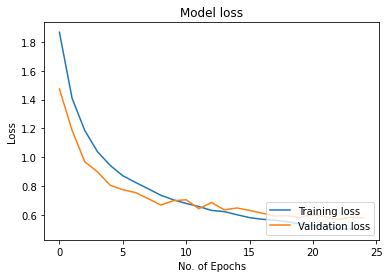

In [ ]:
# ploting loss for training and validation dataset
plot_loss(history)

In [ ]:
# display the accuracy and loss score
print(cnn.metrics_names)
print(cnn.evaluate(X_valid, y_valid, verbose=0))

['loss', 'accuracy']
[0.5637370347976685, 0.8136000037193298]


After applying varying Dropout regularization on layers, the performance of model has increased with validation accuracy is almost 81%. There is no issue of overfitting in model with low loss score 0.56.

###### Lets add `Batch normalization` layer to above model to accelerates the training process of a model and it will also improve the performance of the model by modest regularization.

fit this model to our training dataset and run for `25 epochs`.

In [ ]:
# Define CNN model
cnn = Sequential()

cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
# Batch Normalization layer
cnn.add(BatchNormalization())
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
# Batch Normalization layer
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer
cnn.add(Dropout(0.25))

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
# Batch Normalization layer
cnn.add(BatchNormalization())
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
# Batch Normalization layer
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer
cnn.add(Dropout(0.30))

cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
# Batch Normalization layer
cnn.add(BatchNormalization())
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
# Batch Normalization layer
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer 
cnn.add(Dropout(0.35))

cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
# Batch Normalization layer
cnn.add(BatchNormalization())
# Dropout layer 
cnn.add(Dropout(0.35))
cnn.add(Dense(10, activation='softmax'))

# Compile the CNN model
optimizer = RMSprop(decay=0.000001)
cnn.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# fit the CNN model with 80% as training dataset and 10% as validation dataset
history = cnn.fit(X_train_new, y_train_new, batch_size=64, epochs=25, validation_split=0.10)


Epoch 1/25
633/633 [==============================] - 10s 13ms/step - loss: 1.5197 - accuracy: 0.4787 - val_loss: 1.0599 - val_accuracy: 0.6189
Epoch 2/25
633/633 [==============================] - 8s 13ms/step - loss: 0.9670 - accuracy: 0.6616 - val_loss: 0.9143 - val_accuracy: 0.6764
Epoch 3/25
633/633 [==============================] - 8s 13ms/step - loss: 0.7971 - accuracy: 0.7210 - val_loss: 0.7203 - val_accuracy: 0.7462
Epoch 4/25
633/633 [==============================] - 8s 13ms/step - loss: 0.6975 - accuracy: 0.7555 - val_loss: 0.6478 - val_accuracy: 0.7720
Epoch 5/25
633/633 [==============================] - 8s 13ms/step - loss: 0.6307 - accuracy: 0.7801 - val_loss: 0.6627 - val_accuracy: 0.7789
Epoch 6/25
633/633 [==============================] - 8s 13ms/step - loss: 0.5721 - accuracy: 0.8014 - val_loss: 0.6147 - val_accuracy: 0.7913
Epoch 7/25
633/633 [==============================] - 8s 13ms/step - loss: 0.5311 - accuracy: 0.8161 - val_loss: 0.6192 - val_accuracy: 0.790

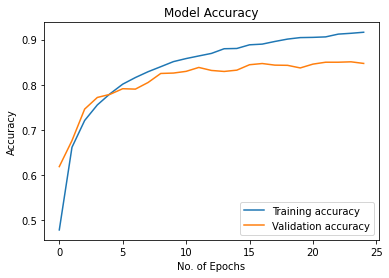

In [ ]:
# ploting accuracy for training and validation dataset
plot_accuracy(history)

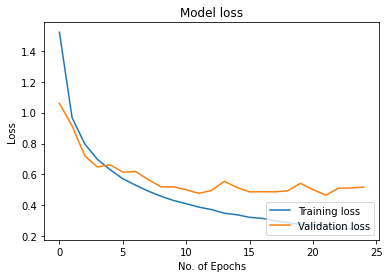

In [ ]:
# ploting loss for training and validation dataset
plot_loss(history)

In [ ]:
# display the accuracy and loss score
print(cnn.metrics_names)
print(cnn.evaluate(X_valid, y_valid, batch_size=64))

['loss', 'accuracy']
79/79 [==============================] - 0s 5ms/step - loss: 0.5137 - accuracy: 0.8572
[0.5137364268302917, 0.857200026512146]


After applying Batch normalization on layers, the performance of model has increased with validation accuracy is almost 86%.  But there is slight issue of overfitting in model with low loss score 0.51 .

`Data Augmentation` : It's generate new training samples from the original dataset by generating modified versions of images. This will expand the training dataset which inturn will improve the performance of model and also handle the overfitting issue. 

###### Lets add Data Augmentation  to above model with rest all same parameters

fit this model to our training dataset and run for `25 epochs`.

In [ ]:
# Define CNN model
cnn = Sequential()

cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
# Batch Normalization layer
cnn.add(BatchNormalization())
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
# Batch Normalization layer
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer 
cnn.add(Dropout(0.25))

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
# Batch Normalization layer
cnn.add(BatchNormalization())
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
# Batch Normalization layer
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer 
cnn.add(Dropout(0.30))

cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
# Batch Normalization layer
cnn.add(BatchNormalization())
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
# Batch Normalization layer
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer 
cnn.add(Dropout(0.35))

cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
# Batch Normalization layer
cnn.add(BatchNormalization())
# Dropout layer added here
cnn.add(Dropout(0.40))
cnn.add(Dense(10, activation='softmax'))

#Lets define data generator 
data_gen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range= 20,
    horizontal_flip=True,
    )

# Compile the CNN model
optimizer = RMSprop(decay=0.000001)
cnn.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Expand the training dataset with iterator
itrain = data_gen.flow(X_train_new, y_train_new, batch_size=64)
nstep = int(X_train_new.shape[0] / 64)

# fit the CNN model with expanded training dataset
history = cnn.fit(itrain, 
                  steps_per_epoch=nstep, 
                  batch_size=64, 
                  epochs=25, 
                  validation_data=(X_valid, y_valid))


Epoch 1/25
703/703 [==============================] - 31s 30ms/step - loss: 1.6904 - accuracy: 0.4078 - val_loss: 1.2407 - val_accuracy: 0.5612
Epoch 2/25
703/703 [==============================] - 21s 29ms/step - loss: 1.1974 - accuracy: 0.5717 - val_loss: 0.9784 - val_accuracy: 0.6574
Epoch 3/25
703/703 [==============================] - 21s 29ms/step - loss: 1.0220 - accuracy: 0.6404 - val_loss: 0.9287 - val_accuracy: 0.6820
Epoch 4/25
703/703 [==============================] - 21s 30ms/step - loss: 0.9379 - accuracy: 0.6720 - val_loss: 0.7449 - val_accuracy: 0.7412
Epoch 5/25
703/703 [==============================] - 21s 30ms/step - loss: 0.8613 - accuracy: 0.6977 - val_loss: 0.8804 - val_accuracy: 0.7152
Epoch 6/25
703/703 [==============================] - 21s 30ms/step - loss: 0.8220 - accuracy: 0.7140 - val_loss: 0.6887 - val_accuracy: 0.7686
Epoch 7/25
703/703 [==============================] - 21s 30ms/step - loss: 0.7848 - accuracy: 0.7285 - val_loss: 0.6782 - val_accuracy:

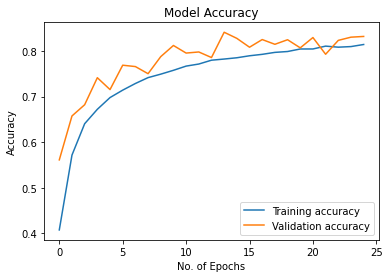

In [ ]:
# ploting accuracy for training and validation dataset
plot_accuracy(history)

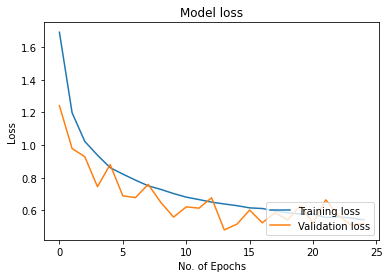

In [ ]:
# ploting loss for training and validation dataset
plot_loss(history)

In [ ]:
# display the accuracy and loss score
print(cnn.metrics_names)
print(cnn.evaluate(X_valid, y_valid, batch_size=64, verbose=0))

['loss', 'accuracy']
[0.5203595161437988, 0.83160001039505]


After applying Data Augmentation on layers, the performance of model is good with validation accuracy is 83% with low loss difference is 0.52. The issue of overfitting in model has been also handled very well. Hence this model has the best accuracy till now with no overfitting issue and have very good performance.

###### Lets run and evaluate above CNN model for test dataset and run for `200 epochs`  for more better performance:


In [ ]:
# Build a CNN model
cnn = Sequential()

cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
# Batch Normalization layer
cnn.add(BatchNormalization())
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
# Batch Normalization layer
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer 
cnn.add(Dropout(0.25))

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
# Batch Normalization layer
cnn.add(BatchNormalization())
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
# Batch Normalization layer
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer
cnn.add(Dropout(0.30))

cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
# Batch Normalization layer
cnn.add(BatchNormalization())
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer='he_uniform'))
# Batch Normalization layer
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer 
cnn.add(Dropout(0.35))


cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
# Batch Normalization layer
cnn.add(BatchNormalization())
# Dropout layer added here
cnn.add(Dropout(0.40))
cnn.add(Dense(10, activation='softmax'))

#Lets define data generator 
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range= 20,
    horizontal_flip=True,
    )

# Compile the CNN model
rms_prop = RMSprop(learning_rate=0.01, decay=0.000001)
cnn.compile(loss='categorical_crossentropy', optimizer=rms_prop, metrics=['accuracy'])

# Expand the training dataset with iterator
it_train = datagen.flow(X_train, y_train, batch_size=64)
steps = int(X_train.shape[0] / 64)

# Summary of the CNN model
cnn.summary()

# fit model
history = cnn.fit(it_train, 
                  steps_per_epoch=steps, 
                  batch_size=64, 
                  epochs=200, 
                  validation_data=(X_test, y_test))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

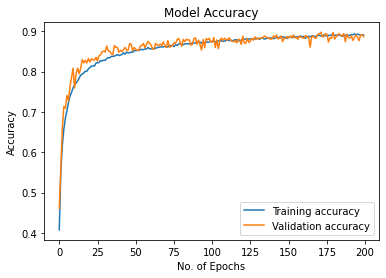

In [ ]:
# ploting accuracy for test dataset
plot_accuracy(history)

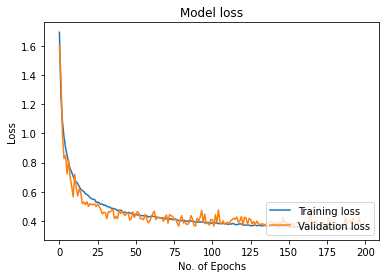

In [ ]:
# ploting accuracy for test dataset
plot_loss(history)

In [ ]:
# display the accuracy and loss score for Test dataset
print(cnn.metrics_names)
print(cnn.evaluate(X_test, y_test, batch_size=64, verbose=0))

['loss', 'accuracy']
[0.34063664078712463, 0.8981000185012817]


###### Accuracy for Test dataset is 89.81% with our above final CNN classification model

###### Lets Check the Precision, Recall, F1-score for the final CNN classification model on Test dataset

In [ ]:
# Check the Predicted label for Test dataset 
pred_label = np.round(cnn.predict(X_test),0)
print("rounded test labels", pred_label)

rounded test labels [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
# Display the Classification report of CNN classification model for Test dataset
print(classification_report(y_test, pred_label, target_names = classes))

              precision    recall  f1-score   support

    airplane       0.94      0.88      0.91      1000
  automobile       0.95      0.96      0.96      1000
        bird       0.89      0.88      0.88      1000
         cat       0.91      0.70      0.79      1000
        deer       0.93      0.86      0.90      1000
         dog       0.88      0.82      0.85      1000
        frog       0.85      0.96      0.90      1000
       horse       0.94      0.93      0.94      1000
        ship       0.96      0.91      0.93      1000
       truck       0.90      0.96      0.93      1000

   micro avg       0.91      0.88      0.90     10000
   macro avg       0.92      0.88      0.90     10000
weighted avg       0.92      0.88      0.90     10000
 samples avg       0.88      0.88      0.88     10000



## Conclusion 

###### 1. Our final CNN model with 3 layers of covolutional and pooling layer with ReLU as activation function along with Dropout, Batch Normalization, Data Augmentation layer and RMSProp as Optimizer with decay of 0.000001 gives the evaluation of `89.81% accuracy` with very low loss score 0.34 on the test dataset. The two plots also indicates that the final model also has no issue of overfitting/underfitting error too.

###### 2. F1-score for Artificial class label like airplane, ship etc appears to be high in compare to the F1-score of natural class label like bird, cat, etc. This means CNN model learns faster to recognize the artificial class where it has little difficulty in recognizing natural class.  